In [70]:
import pandas as pd
import numpy as np
import pymongo
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["zavrsni_db"]
drivers_collection = mydb["drivers"]
obd_data_collection = mydb["obd_data"]
trips_collection = mydb["trips"]

In [14]:
df_drivers = pd.DataFrame(list(drivers_collection.find()))
df_obd = pd.DataFrame(list(obd_data_collection.find()))
df_trips = pd.DataFrame(list(trips_collection.find()))

In [90]:
df_drivers.head(5)

,_id,vehicle,androidId,gender,age
0,5fd1f2274d291a3bf49194ea,Alfa Romeo Giulietta 2012,565c540be5ee059a,male,25
1,5fd1f4a54d291a3bf49194eb,Citroen C4 Picasso 2015,49a68088082721e5,female,52
2,5fd1f4fb4d291a3bf49194ec,Fiat Grande Punto 2007,93089fee5e666ae4,female,26
3,5fd1f5134d291a3bf49194ed,Fiat Grande Punto 2007,31308a71d02bc97e,male,26
4,5fd1f57a4d291a3bf49194ee,Fiat Punto Evo 2011,f35d74efacbff28a,female,25


In [86]:
full_desc = df_drivers.describe()

In [87]:
full_desc.drop(
    labels=["top","freq"],
    axis = 0
)

,_id,vehicle,androidId,gender,age
count,9,9,9,9,9
unique,9,8,9,2,6


Text(0.5, 0, 'Age')

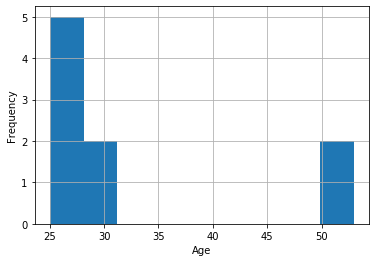

In [88]:
age = df_drivers["age"].astype(int)
age = age.sort_values()
age.hist(bins=9)
plt.ylabel('Frequency')
plt.xlabel('Age')

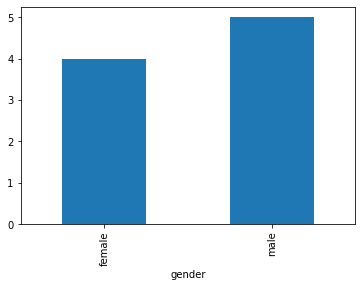

In [89]:
by_gender = df_drivers.groupby('gender')
by_gender.size().plot(kind='bar')

In [93]:
df_trips.head()

,_id,vehicleInfo,mobileDeviceInfo,tripId,tripStartTimestamp
0,5f9edacf8a67f70262394a01,"{'pids01_20': '983B0011', 'fuelType': 'Diesel'...","{'displayHeight': 2960, 'appVersion': '1.1.1 (...",41dc2eec-fea6-4b29-954f-1b231fd038d1,1604246215279
1,5fa0ffd016cf65026da2ff48,"{'pids01_20': 'BE3EB811', 'fuelType': 'Petrol ...","{'displayHeight': 2192, 'appVersion': '1.1.1 (...",bfbc1576-c55a-4871-858a-840789a80afc,1604386762784
2,5fa17c7b8a67f7027cd861cb,"{'pids01_20': 'BE3EB811', 'fuelType': 'Petrol ...","{'displayHeight': 2192, 'appVersion': '1.1.1 (...",591093cd-6579-444a-a04f-81da267abdb7,1604418678141
3,5fa182b34fb37d02db865ea1,"{'pids01_20': 'BE3EB811', 'fuelType': 'Petrol ...","{'displayHeight': 2192, 'appVersion': '1.1.1 (...",91b5703b-86e6-41e6-a2b5-8b5b48859fad,1604420272699
4,5fa325284fb37d02db8660ad,"{'pids01_20': '983B0011', 'fuelType': 'Diesel'...","{'displayHeight': 2960, 'appVersion': '1.1.2 (...",ba5aac62-b75d-45ee-9ddf-5d60226a6d11,1604527387075


In [101]:
df_trips["tripId"].describe()

count                                      212
unique                                     212
top       267aa031-db65-423b-9fe1-c31f3976b012
freq                                         1
Name: tripId, dtype: object

In [144]:
df_trips.head()

,_id,vehicleInfo,mobileDeviceInfo,tripId,tripStartTimestamp
0,5f9edacf8a67f70262394a01,"{'pids01_20': '983B0011', 'fuelType': 'Diesel'...","{'displayHeight': 2960, 'appVersion': '1.1.1 (...",41dc2eec-fea6-4b29-954f-1b231fd038d1,1604246215279
1,5fa0ffd016cf65026da2ff48,"{'pids01_20': 'BE3EB811', 'fuelType': 'Petrol ...","{'displayHeight': 2192, 'appVersion': '1.1.1 (...",bfbc1576-c55a-4871-858a-840789a80afc,1604386762784
2,5fa17c7b8a67f7027cd861cb,"{'pids01_20': 'BE3EB811', 'fuelType': 'Petrol ...","{'displayHeight': 2192, 'appVersion': '1.1.1 (...",591093cd-6579-444a-a04f-81da267abdb7,1604418678141
3,5fa182b34fb37d02db865ea1,"{'pids01_20': 'BE3EB811', 'fuelType': 'Petrol ...","{'displayHeight': 2192, 'appVersion': '1.1.1 (...",91b5703b-86e6-41e6-a2b5-8b5b48859fad,1604420272699
4,5fa325284fb37d02db8660ad,"{'pids01_20': '983B0011', 'fuelType': 'Diesel'...","{'displayHeight': 2960, 'appVersion': '1.1.2 (...",ba5aac62-b75d-45ee-9ddf-5d60226a6d11,1604527387075


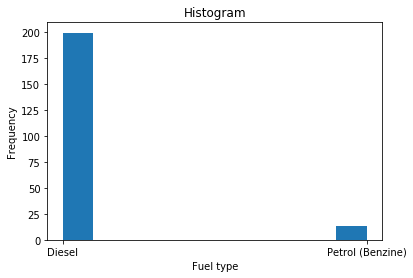

In [143]:
fuels = []
for i in df_trips["vehicleInfo"].iteritems():
    #print((i[1])['fuelType'])
    fuels.append((i[1])['fuelType'])
n, bins, patches=plt.hist(fuels)
plt.xlabel("Fuel type")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

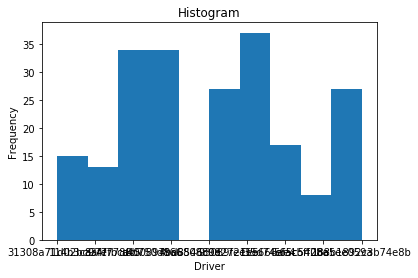

In [160]:
androids = []
for i in df_trips["mobileDeviceInfo"].iteritems():
    #print((i[1])['fuelType'])
    androids.append((i[1])['androidId'])
n, bins, patches=plt.hist(androids)
plt.xlabel("Driver")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()